In [1]:
# import required libraries
from fastai.vision.all import *
from fastai.callback.core import Callback

In [2]:
# set path to the directory containing data
path = Path('Fabric Dataset-20230617T011229Z-001/Fabric Dataset/2 Classes Model')
IMG_SIZE = 255

In [4]:
# Define the labels
labels = [parent_label(img) for img in get_image_files(path)]

In [5]:
# define function to create dataset
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                       get_items=get_image_files,
                       splitter=RandomSplitter(valid_pct = 0.2, seed = 42),
                       get_y=parent_label,
                       item_tfms=[Resize(IMG_SIZE, ResizeMethod.Pad)],
                       batch_tfms=[Normalize()])
dls = dblock.dataloaders(path, batch_size=10)

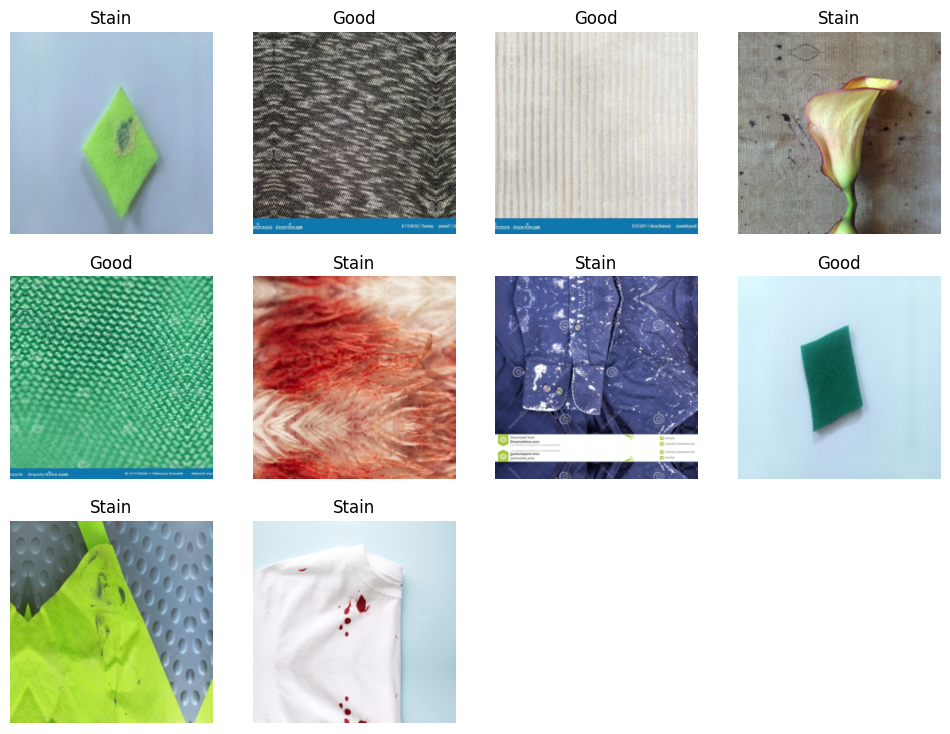

In [8]:
dls.show_batch(max_n=36)

In [7]:
print(dls.train.one_batch()[0].shape)

torch.Size([10, 3, 255, 255])


In [9]:
dls.vocab

['Good', 'Stain']

In [10]:
dls.valid.n

52

In [11]:
learn = vision_learner(dls, resnet50, metrics=[error_rate,accuracy], 
                       loss_func = CrossEntropyLossFlat(),cbs=[GradientAccumulation(n_acc=4), ShowGraphCallback(),  
                        EarlyStoppingCallback(monitor='valid_loss', min_delta=0.01, patience=3)], pretrained=true)

c:\college task\skripsi\opencv topic\fastai\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\college task\skripsi\opencv topic\fastai\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


SuggestedLRs(valley=0.0010000000474974513)

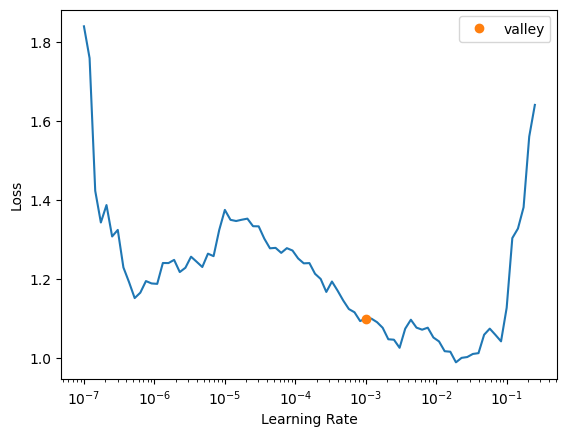

In [12]:
learn.lr_find()

<b> Fine Tune with Traceback <b>
    <p> Fine tuning is one of the technique that used on deep learning task. 
        The model that we fine-tune is ResNet50. For doing fine tuning we can run <b>learn.fine_tune(epochs,learning_rate)<b>.<p> 

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.971513,0.558161,0.288462,0.711538,02:44
1,0.809391,0.254189,0.173077,0.826923,03:28
2,0.645924,0.530852,0.192308,0.807692,03:53
3,0.600443,0.364776,0.076923,0.923077,04:20
4,0.444738,0.254895,0.115385,0.884615,03:13


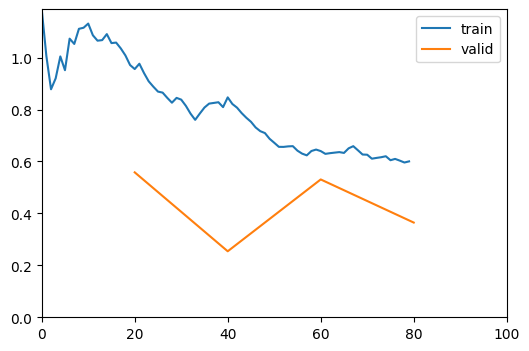

No improvement since epoch 1: early stopping


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.185512,0.356858,0.134615,0.865385,03:17
1,0.212352,0.181521,0.096154,0.903846,03:12
2,0.212984,0.257465,0.057692,0.942308,03:11
3,0.252894,0.165057,0.076923,0.923077,03:01
4,0.234263,0.309600,0.076923,0.923077,03:07
5,0.198421,0.247203,0.057692,0.942308,03:03
6,0.189201,0.192682,0.057692,0.942308,03:23


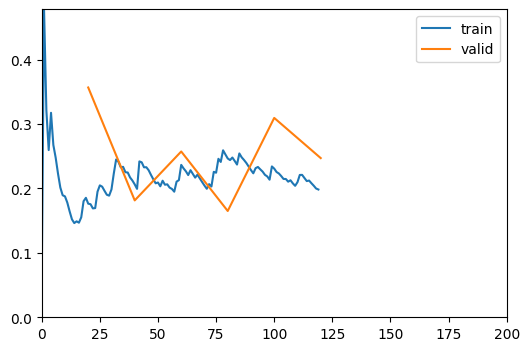

No improvement since epoch 3: early stopping


In [13]:
import traceback

try:
    learn.fine_tune(10, freeze_epochs = 5, base_lr=0.001)
except Exception as e:
    print(traceback.format_exc())

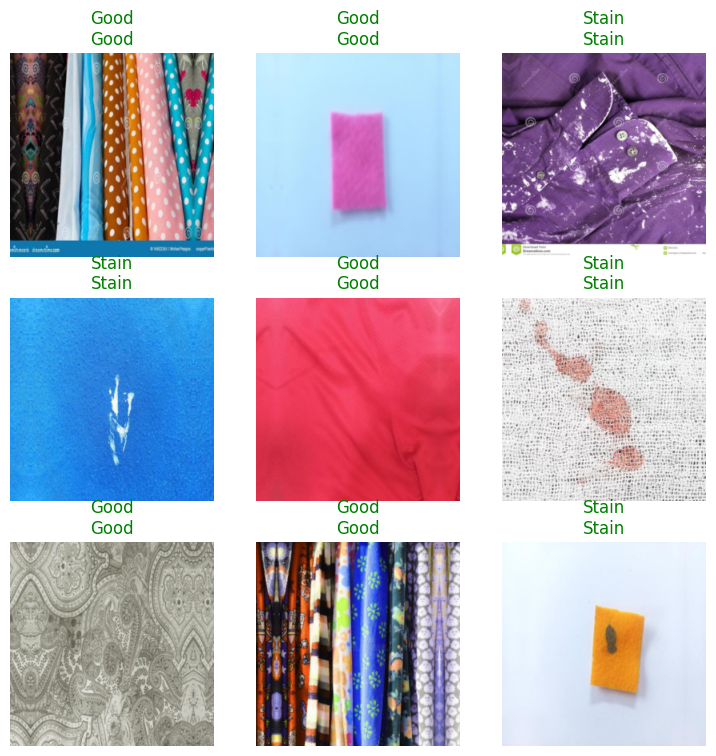

In [13]:
learn.show_results()

In [14]:
interp = ClassificationInterpretation.from_learner(learn)

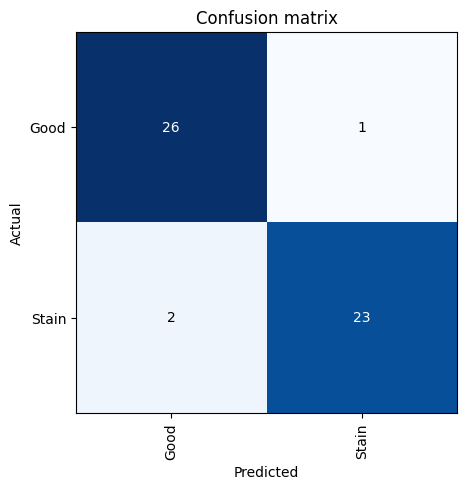

In [15]:
interp.plot_confusion_matrix()

In [16]:
learn.export('ModelFabric-RandSplit-2ClassOnly.pkl')

In [17]:
learn_inf = load_learner('ModelFabric-RandSplit-2ClassOnly.pkl')

In [18]:
learn_inf.predict('Fabric Dataset/test image/WhatsApp Image 2023-06-26 at 14.51.52.jpeg')

('Stain', TensorBase(1), TensorBase([1.7965e-04, 9.9982e-01]))